In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "/Users/yuki-f/Documents/SocSEL/Research/DTW/data/dtw/dtw202109"

In [3]:
df = pd.DataFrame(columns=["i", "j", "dtw"])
for i in range(1, 1528):
    print(i)
    df = pd.concat([df, pd.read_csv(path + "/dtw/dtw-" + str(i) + "0000.csv", usecols=["i", "j", "dtw"])])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [4]:
frame = []
for i in range(5527):
    frame.insert(i, len(pd.read_csv(path + "/splitted/" + str(i) + ".csv", usecols=["time"])))

In [5]:
df = df.sort_values("dtw")
df = df.reset_index(drop=True)
df = df.drop_duplicates(subset=["i", "j", "dtw"])

In [6]:
df.head

<bound method NDFrame.head of              i     j         dtw
0            0  4878    0.000000
1          753   937    0.000000
2          753  2721    0.000000
3          753  1124    0.000000
4          753  1500    0.000000
...        ...   ...         ...
15261441  1993  3609  140.476342
15261442  3609  5389  140.592929
15261443  3609  3908  141.007143
15261444  3609  5240  141.421356
15261445  3609  5253  141.421356

[15261446 rows x 3 columns]>

In [14]:
iFrame = []
for d in df["i"]:
    iFrame.append(frame[d])
    
jFrame = []
for d in df["j"]:
    jFrame.append(frame[d])

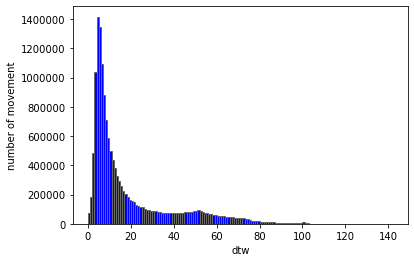

In [7]:
# ヒストグラム
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
edges = range(0, 143, 1)

ax.hist(df["dtw"], bins=edges, color="blue", ec="dimgray")

ax.set_xlabel("dtw")
ax.set_ylabel("number of movement")

plt.ticklabel_format(style='plain',axis='y')

fig.savefig("/Users/yuki-f/Desktop/hist.png")

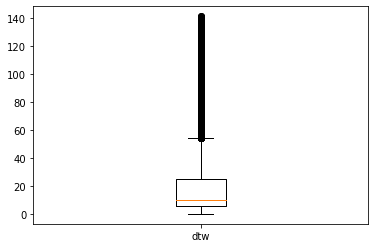

In [10]:
# 箱髭図
fig = plt.figure()
ax = fig.add_subplot()

bp = ax.boxplot(df["dtw"])
ax.set_xticklabels(["dtw"])

fig.savefig("/Users/yuki-f/Desktop/box.png")

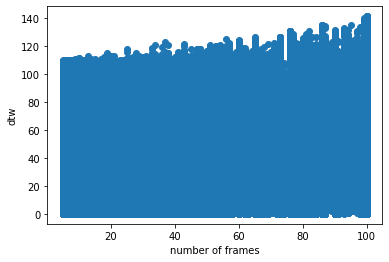

In [28]:
# 散布図
copydf = pd.concat([df, df])
copyframe = iFrame + jFrame

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(copyframe, copydf["dtw"])

ax.set_xlabel("number of frames")
ax.set_ylabel("dtw")

fig.savefig("/Users/yuki-f/Desktop/scatter1.png")

In [19]:
len(copydf)

30522892

In [18]:
len(copyframe)

30522892

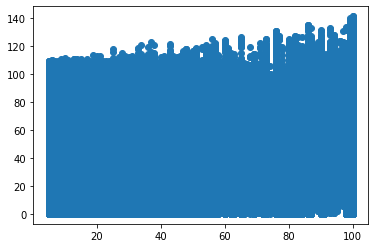

In [33]:
# 散布図（i列ver）
plt.scatter(iFrame, df["dtw"])

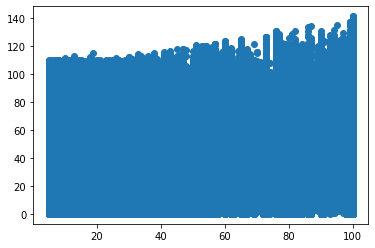

In [34]:
# 散布図(j列ver)
plt.scatter(jFrame, df["dtw"])

In [ ]:
# 散布図(j列ver)
plt.scatter(frame, df["dtw"])

In [55]:
minval = df[df["i"] == 0]["dtw"].min()

In [57]:
df[(df["i"] == 0) & (df["dtw"] == minval)]

,i,j,dtw
0,0,4878,0.0
20693,0,1064,0.0
20694,0,1063,0.0
20695,0,1062,0.0
20696,0,11,0.0
...,...,...,...
21613,0,78,0.0
21915,0,1025,0.0
21917,0,5344,0.0
21918,0,1248,0.0


In [105]:
df[(df["i"] == 370) | (df["j"] == 370)]

,i,j,dtw
845,212,370,0.000000
11119,345,370,0.000000
12013,290,370,0.000000
12949,287,370,0.000000
16346,370,1265,0.000000
...,...,...,...
15240527,370,2336,100.000000
15240537,370,683,100.000000
15240546,370,974,100.000000
15240552,370,3273,100.000000


In [132]:
find = 560
val = 0
count = 0
for d in df["i"]:
    if d == find:
        val = count
        break
        
    count += 1
        
count = 0
for d in df["j"]:
    if count >= val:
        break
        
    if d == find:
        val = count
        break
        
    count += 1
    
print(df.loc[val, "dtw"])

2.3457673052654866


In [110]:
scatplot = pd.DataFrame(columns=["value", "frame"])

minvals = []
frames = []

for n in range(5527):
    find = n
    val = 0
    count = 0
    for d in df["i"]:
        if d == find:
            val = count
            break

        count += 1

    count = 0
    for d in df["j"]:
        if count >= val:
            break

        if d == find:
            val = count
            break

        count += 1

    minvals += [df.loc[val, "dtw"]]
    frames += [frame[n]]
    
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [22]:
checkFlag = []
minval = []

for i in range(5527):
    checkFlag += [False]
    minval += [0]
    
for d in df.itertuples():    
    if not checkFlag[d.i]:   
        checkFlag[d.i] = True
        minval[d.i] = d.dtw
    
    if not checkFlag[d.j]:
        checkFlag[d.j] = True
        minval[d.j] = d.dtw

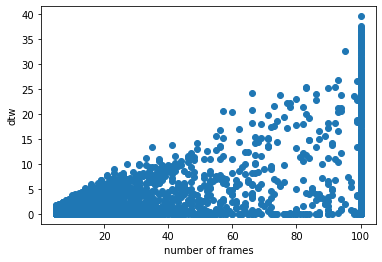

In [27]:
# 散布図
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(frame, minval)

ax.set_xlabel("number of frames")
ax.set_ylabel("dtw")

fig.savefig("/Users/yuki-f/Desktop/scatter2.png")

In [141]:
minval[560]

2.3457673052654866

In [142]:
min(frame)

5

In [31]:
# 平均値
np.average(df["dtw"])

18.990331611392698

In [32]:
# 中央値
np.median(df["dtw"])

9.66674579962353